# t-SNE (t-distributed Stochastic Neighbor Embedding)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

**Carga y visualización de imágenes de dígitos**

Este bloque de código carga el conjunto de datos 'digits' y visualiza las primeras imágenes, lo que permite entender mejor la estructura de los datos antes de aplicar la reducción dimensional.

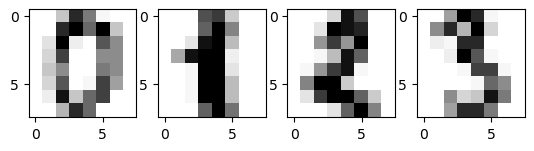

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()
fig, ax = plt.subplots(1, 4)
for i in range(4):
    ax[i].imshow(digits.images[i], cmap='Greys')
plt.show()

Como se puede observar, se muestran las primeras 3 imágenes de dígitos en escala de grises, representando cada imagen como una cuadrícula de píxeles de 8x8. Esto permite verificar que se trata de muestras de dígitos manuscritos con distintas formas y tamaños, lo que da una primera idea de la variabilidad en el conjunto.

**Obtención de dimensiones del dataset y separación de características y etiquetas**

Se obtiene la forma de los datos mediante digits.data.shape, y se separan las características (X_digits) y las etiquetas (y_digits), las cuales representan imágenes de dígitos y sus valores reales, respectivamente.

In [3]:
digits.data.shape

(1797, 64)

In [4]:
y_digits = digits.target
X_digits = digits.data

Como se puede observar, el tamaño del dataset es de 1797 filas y 64 columnas (una por cada píxel de las imágenes de 8x8), donde cada conjunto tiene 64 características, que representan los niveles de intensidad de cada píxel en la imagen, lo que sugiere la necesidad de realizar una reducción dimensional para visualizar mejor los patrones.

**Aplicación de t-SNE en reducción dimensional no lineal**

Este bloque de código aplica el algoritmo t-SNE para reducir la dimensionalidad de las imágenes de 64 a 2 dimensiones, usando como inicialización PCA, lo que permite visualizar la estructura de los datos en un plano bidimensional.

La proyección t-SNE transforma los datos a 2 dimensiones, permitiendo visualizar las relaciones no lineales en el espacio reducido, lo que crea un mapa bidimensional en el que cada grupo representa un dígito diferente, formando grupos compactos y bien definidos.

In [5]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, init='pca',
            random_state=123)
X_digits_tsne = tsne.fit_transform(X_digits)

**Definición y aplicación de la función de visualización**

Se define la función plot_projection para visualizar los dígitos en el espacio reducido de 2 dimensiones, donde cada dígito tiene un color distinto añadiendo una etiqueta en el centro de cada grupo con su número correspondiente.

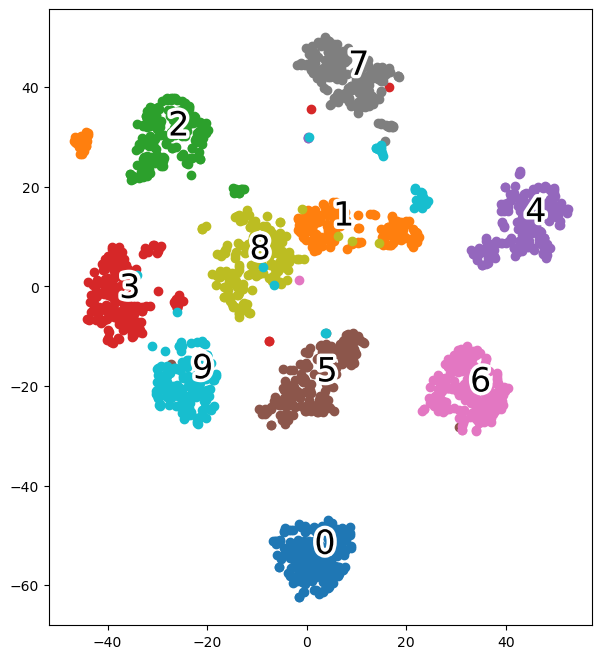

In [6]:
import matplotlib.patheffects as PathEffects
def plot_projection(x, colors):

    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    for i in range(10):
        plt.scatter(x[colors == i, 0],
                    x[colors == i, 1])
    
    for i in range(10):
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        
plot_projection(X_digits_tsne, y_digits)
plt.show()

Como se puede observar, el gráfico resultante muestra los dígitos agrupados en el plano bidimensional con cada dígito identificado mediante un color y una etiqueta numérica. 

Si los grupos de dígitos aparecen bien separados, esto indica que t-SNE ha capturado con éxito la estructura no lineal de los datos, lo que permite ver cómo los dígitos similares están más próximos entre sí en el espacio reducido. 

En caso de solapamiento entre algunos dígitos, se podría ajustar mediante perplexity o explorar otras técnicas de reducción no lineal para mejorar la separación.